# California Housing Prices

The goal of this homework is to create a regression model for predicting housing prices (column `median_house_value`).

In this homework we'll again use the California Housing Prices dataset - the same one we used in homework 2 and 3.

We can take it from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices) or download using the wget link mentioned below:

In [1]:
import os

if not os.path.isfile('housing.csv'):
    !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

## Load the Data

We need to import the required libraries and then load the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Load the data
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Check num of rows and columns
df.shape

(20640, 10)

In [5]:
# Check data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

## Preprocess the Data

- Fill NAs with `0`.
- Apply the log transform to `median_house_value`.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the `train_test_split` function and set the `random_state` parameter to 1.
- Use `DictVectorizer` to turn the dataframe into matrices.

Let's perform these tasks on one at a time.

In [6]:
# Check the missing values in the df
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
# Fill missing values in 'total_bedrooms' column with '0'
df['total_bedrooms'].fillna(0, inplace=True)

In [8]:
# View the dataframe again
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
# 'median_house_value' before log transformation
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [10]:
# Apply log tranformation to column 'median_house_value'
df.median_house_value = np.log1p(df.median_house_value)
df.median_house_value

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [11]:
# Split data into train/val/test with 60/20/20 distribution and 'random_state' to 1
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [12]:
# View the data distribution
df_train.shape, df_val.shape, df_test.shape

((12384, 10), (4128, 10), (4128, 10))

In [13]:
# Reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
# Create target variables from dfs
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [15]:
# Remove target variables from dfs
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [16]:
# Apply DictVectorizer on df_train and df_val
from sklearn.feature_extraction import DictVectorizer

# Prepare train data
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

# Prepare validation data
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable.

- Train a model with `max_depth=1`

Which feature is used for splitting the data?

- `ocean_proximity=INLAND`
- `total_rooms`
- `latitude`
- `population`

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Create decision tree model with max depth of 1
dt = DecisionTreeRegressor(max_depth=1)

# Train the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

D:\repos\ml-engineering\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


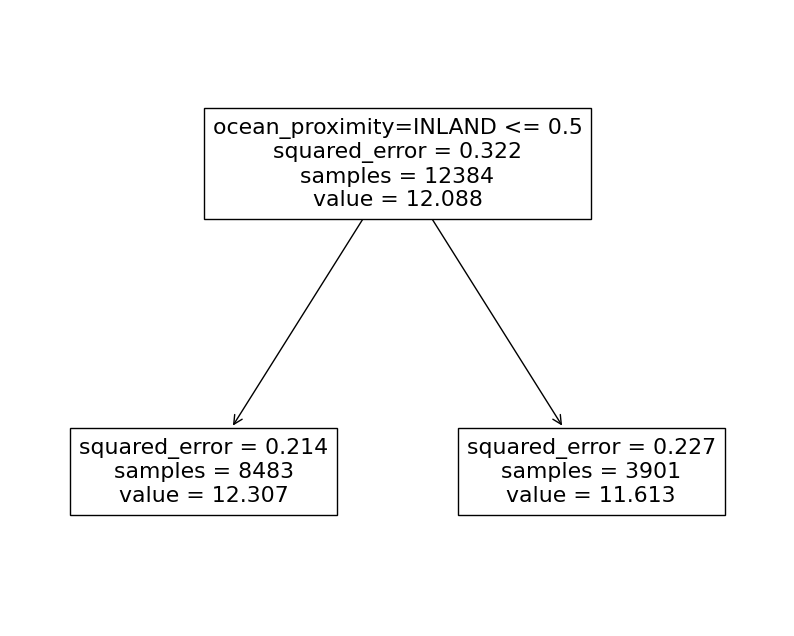

In [18]:
# Visualize which feature is used for splitting the data
from sklearn import tree

plt.figure(figsize=(10, 8))
tree.plot_tree(dt, feature_names=dv.get_feature_names())
plt.show()

`ocean_proximity=INLAND` is used for data split.

## Question 2

Train a random forest model with these parameters:

- `n_estimators=10`
- `random_state=1`
- `n_jobs=-1` (optional - to make training faster)

What's the RMSE of this model on validation?

- 0.05
- 0.25
- 0.55
- 0.85

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create random forest model
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [20]:
# Make predictions on validation data
y_pred = rf.predict(X_val)

# Calculate RMSE on validation
rmse = mean_squared_error(y_val, y_pred, squared=False) # squared=False returns rmse value
rmse.round(2)

0.25

The rmse is `0.25`.

## Question 3

Now let's experiment with the `n_estimators` parameter.

- Try different values of this parameter from 10 to 200 with step 10.
- Set `random_state` to `1`.
- Evaluate the model on the validation dataset.

After which value of `n_estimators` does RMSE stop improving?

- 10
- 50
- 70
- 150

In [21]:
from tqdm.auto import tqdm

# Experiment random forest model with different n_estimators
scores = []

for est in tqdm(range(10, 201, 10)):
    rf = RandomForestRegressor(n_estimators=est, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    
    scores.append((est, rmse))

  0%|          | 0/20 [00:00<?, ?it/s]

In [22]:
# Create dataframe from scores
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.245454
1,20,0.239133
2,30,0.235631
3,40,0.234526
4,50,0.233065
5,60,0.232812
6,70,0.232360
7,80,0.232504
8,90,0.232179
9,100,0.231951


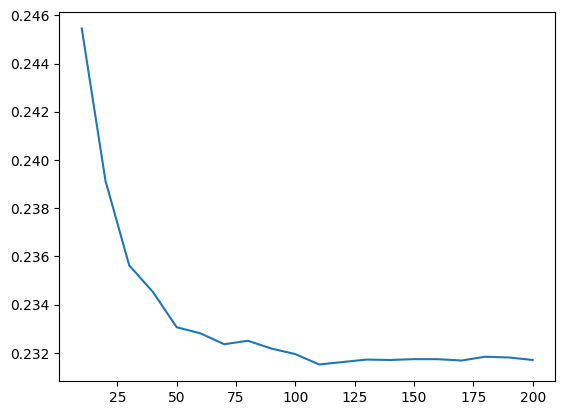

In [23]:
plt.plot(df_scores.n_estimators, df_scores.rmse)
plt.show()

The rmse doesn't improve at all and keeps dropping. So, at `n_estimators=10` the rmse stops improving.

## Question 4

Let's select the best `max_depth`:

- Try different values of `max_depth`: `[10, 15, 20, 25]`
- For each of these values, try different values of `n_estimators` from 10 till 200 (with step 10)
- Fix the random seed: `random_state=1`

What's the best `max_depth`:

- 10
- 15
- 20
- 25

In [24]:
# Train rf model on max depth values of [10, 15, 20, 25]

scores = []

for depth in tqdm([10, 15, 20, 25]):
    # build rf model and set 'warm_start=True' to reuse solution of the previous call
    # and add more estimators to the ensemble
    rf = RandomForestRegressor(n_estimators=10,
                               max_depth=depth,
                               random_state=1,
                               n_jobs=-1,
                               warm_start=True)
    
    for est in tqdm(range(10, 201, 10)):
        rf.n_estimators = est
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        
        scores.append((depth, est, rmse))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [25]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
df_scores

,max_depth,n_estimators,rmse
0,10,10,0.255042
1,10,20,0.252784
2,10,30,0.251647
3,10,40,0.251062
4,10,50,0.250192
...,...,...,...
75,25,160,0.231503
76,25,170,0.231458
77,25,180,0.231613
78,25,190,0.231616


In [26]:
df_scores.max_depth

0     10
1     10
2     10
3     10
4     10
      ..
75    25
76    25
77    25
78    25
79    25
Name: max_depth, Length: 80, dtype: int64

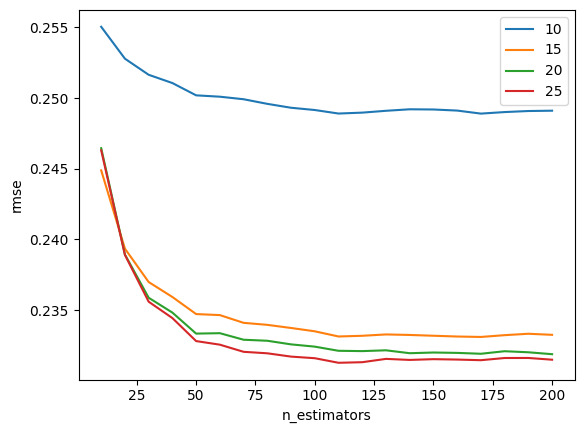

In [27]:
for depth in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == depth]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=depth)

plt.xlabel('n_estimators')
plt.ylabel('rmse')
plt.legend()
plt.show()

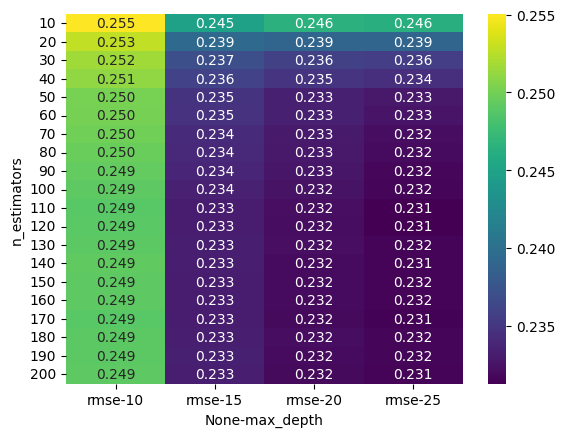

In [28]:
# Create pivot table
df_scores_pivot = df_scores.pivot(index='n_estimators', columns=['max_depth'], values=['rmse'])

# Create heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f', cmap='viridis')
plt.show()

According to these graphs, we get the better rmse when the max depth size is `25`.

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the `feature_importance_` field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
    - `n_estimators=10`
    - `max_depth=20`
    - `random_state=1`
    - `n_jobs=-1` (optional)
    
- Get the feature importance information from this model

What's the most important feature?

- `total_rooms`
- `median_income`
- `total_bedrooms`
- `longitude`

In [29]:
# Build rf model and train
rf = RandomForestRegressor(n_estimators=10,
                           max_depth=20,
                           random_state=1,
                           n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [30]:
# Array of features importance
importances = rf.feature_importances_
# Store importances array to Series and set index as feature names
forest_importance = pd.Series(importances, index=dv.get_feature_names_out())

# View results in descending order
forest_importance.sort_values(ascending=False)

median_income                 0.363080
ocean_proximity=INLAND        0.310901
latitude                      0.101310
longitude                     0.096312
housing_median_age            0.033105
population                    0.030960
total_rooms                   0.020512
total_bedrooms                0.018634
households                    0.017169
ocean_proximity=NEAR OCEAN    0.004243
ocean_proximity=<1H OCEAN     0.002988
ocean_proximity=NEAR BAY      0.000429
ocean_proximity=ISLAND        0.000357
dtype: float64

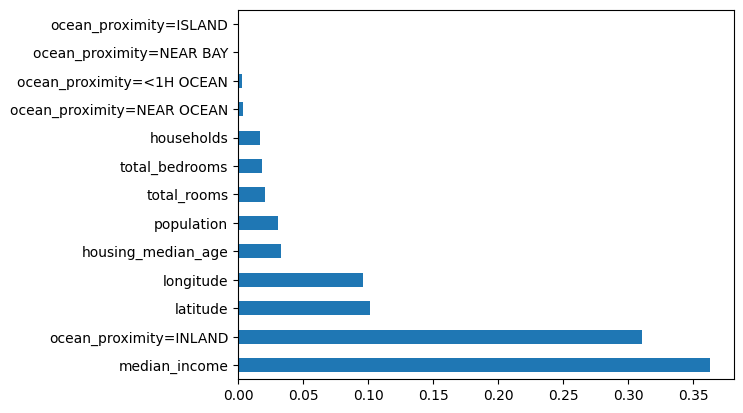

In [31]:
# Visualize the results
fig, ax = plt.subplots()
forest_importance.sort_values(ascending=False).plot.barh(ax=ax)
plt.show()

`median_income` is the most important feature.

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

- Install XGBoost (if not already)
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:
```python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both gives same

In [32]:
# Extract feature names from dv
features = dv.get_feature_names_out()
features

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

One of the features contain `<`, remove it from the otherwise it will cause `ValueError` when creating xgboost dmatrix.

In [33]:
import re

# Regex pattern
pattern = re.compile(r"\[|\]|<", re.IGNORECASE)

# List to store feature names after applying 'pattern'
feature_list = []
for col in features:
    if any(x in str(col) for x in set(('[', ']', '<'))):
        col = pattern.sub("_", col)
    else:
        col
    feature_list.append(col)
    
feature_list

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=_1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [34]:
import xgboost as xgb

# Create DMatrix for train and validation
dtrain = xgb.DMatrix(data=X_train, label=y_train, feature_names=feature_list)
dval = xgb.DMatrix(data=X_val, label=y_val, feature_names=feature_list)

In [35]:
# Create watchlist
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [36]:
# Function to parse xgb output and return dataframe
def parse_xgb_output(output):
    # list to store iteration num, train and val rmse
    results = []
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    # create dataframe with iteration number, train and val rmse
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    
    return df_results

In [37]:
# Dict to store rmse on different eta values
scores = {}

Train the model with eta `0.3`.

In [38]:
%%capture output

# Set parameters
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

# Build and train model for 100 iterations
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist)

In [39]:
# Extract the value of each eta from 'xgb_params'
key = f"eta={xgb_params['eta']}"

# Store the information in the 'scores' dictionary
scores[key] = parse_xgb_output(output)

Train the model with eta `0.1`.

In [40]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist)

In [41]:
# Extract the value of each eta from 'xgb_params'
key = f"eta={xgb_params['eta']}"

# Store the information in the 'scores' dictionary
scores[key] = parse_xgb_output(output)

In [42]:
# Learning rates in the scores dict
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

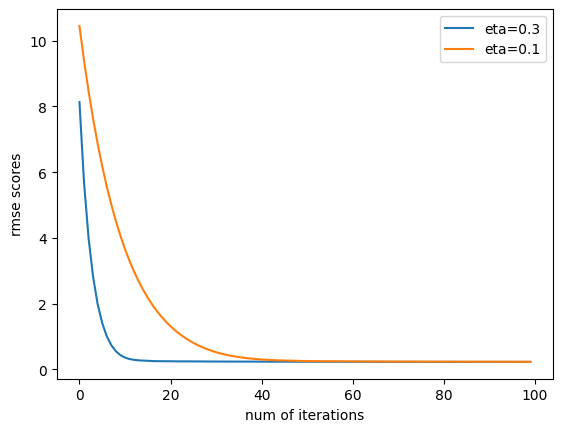

In [43]:
# Plot scores dataframe to make comparison on different eta
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
    
plt.xlabel('num of iterations')
plt.ylabel('rmse scores')
plt.legend()

plt.show()

`Both` have the same rmse score.